In [1]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import pandas as pd

import warnings

import math
warnings.filterwarnings('ignore')

import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM,Dense

plt.style.use(style="seaborn")
%matplotlib inline

In [3]:
df= pd.read_csv(r"C:\Users\omami\OneDrive\Desktop\Sem_2_ISI\Time series\Project\Codes\Bajaj(18-21).csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           991 non-null    object
 1   series         991 non-null    object
 2   OPEN           991 non-null    object
 3   HIGH           991 non-null    object
 4   LOW            991 non-null    object
 5   PREV. CLOSE    991 non-null    object
 6   ltp            991 non-null    object
 7   close          991 non-null    object
 8   vwap           991 non-null    object
 9   52W H          991 non-null    object
 10  52W L          991 non-null    object
 11  VOLUME         991 non-null    int64 
 12  VALUE          991 non-null    object
 13  No of trades   991 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 108.5+ KB


In [5]:
df=df.rename(columns={"Date " :"Date","close ":"close"})

In [6]:
## converting Date in date time format
df['Date'] = pd.to_datetime(df['Date'])
df=df.sort_values(by='Date')

In [7]:
df.set_index("Date",drop=True,inplace=True)

In [8]:
df["close"]=df["close"].str.replace(",","")
df["close"]=pd.to_numeric(df["close"])

In [9]:
df=df[["close"]]

In [10]:
df.head(5)

,close
Date,
2018-01-01,1725.65
2018-01-02,1724.65
2018-01-03,1715.30
2018-01-04,1754.00
2018-01-05,1814.50


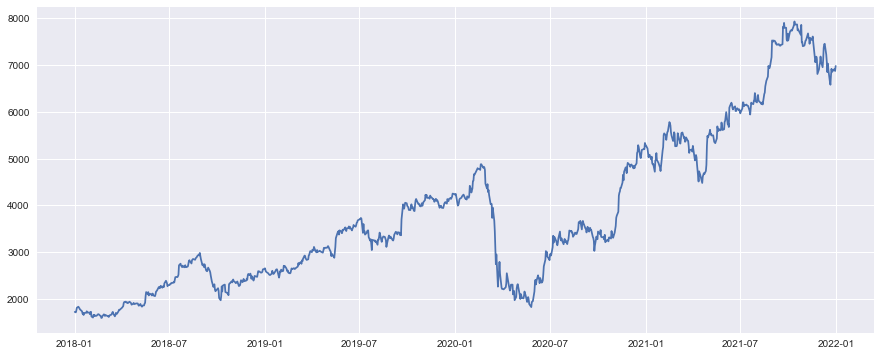

In [11]:
plt.figure(1,figsize=(15,6))
plt.plot(df.close)

### calculate percentage change

###  We can see mean is canstant

In [12]:
data=df.filter(["close"])

dataset=data.values

In [13]:
dataset

array([[1725.65],
       [1724.65],
       [1715.3 ],
       [1754.  ],
       [1814.5 ],
       [1836.85],
       [1819.5 ],
       [1802.2 ],
       [1780.35],
       [1770.1 ],
       [1738.15],
       [1687.35],
       [1701.2 ],
       [1660.7 ],
       [1701.9 ],
       [1706.35],
       [1708.7 ],
       [1739.15],
       [1710.3 ],
       [1715.3 ],
       [1678.4 ],
       [1677.85],
       [1729.45],
       [1628.9 ],
       [1604.95],
       [1662.15],
       [1641.65],
       [1662.15],
       [1639.4 ],
       [1643.8 ],
       [1669.95],
       [1677.05],
       [1675.25],
       [1642.7 ],
       [1638.75],
       [1596.45],
       [1600.35],
       [1633.4 ],
       [1674.95],
       [1656.8 ],
       [1640.25],
       [1659.35],
       [1636.95],
       [1637.75],
       [1618.35],
       [1628.05],
       [1654.2 ],
       [1665.25],
       [1680.7 ],
       [1710.1 ],
       [1726.25],
       [1687.9 ],
       [1631.85],
       [1657.3 ],
       [1704.55],
       [16

In [14]:
training_data_size=math.ceil(len(df)*.85)
training_data_size

843

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [17]:
scaled_data[:5]

array([[0.02040156],
       [0.02024365],
       [0.01876722],
       [0.02487821],
       [0.03443158]])

In [18]:
train_data=scaled_data[0:training_data_size,:]
x_train=[]
y_train=[]
n=60
for i in range(n,len(train_data)):
    x_train.append(train_data[i-n:i,0])
    y_train.append(train_data[i,0])
    if i<61:
        print(x_train)
        print(y_train)
        

[array([0.02040156, 0.02024365, 0.01876722, 0.02487821, 0.03443158,
       0.03796079, 0.03522111, 0.03248932, 0.02903906, 0.02742051,
       0.02237539, 0.01435373, 0.01654074, 0.01014551, 0.01665127,
       0.01735396, 0.01772504, 0.0225333 , 0.01797769, 0.01876722,
       0.01294046, 0.01285361, 0.0210016 , 0.00512408, 0.00134221,
       0.01037448, 0.00713739, 0.01037448, 0.0067821 , 0.00747689,
       0.01160615, 0.01272729, 0.01244305, 0.00730319, 0.00667946,
       0.        , 0.00061584, 0.00583466, 0.01239568, 0.00952967,
       0.00691632, 0.00993234, 0.00639522, 0.00652155, 0.00345816,
       0.00498985, 0.00911912, 0.01086399, 0.01330365, 0.01794611,
       0.0204963 , 0.01444058, 0.0055899 , 0.00960863, 0.01706972,
       0.01565646, 0.01403002, 0.02292017, 0.02779159, 0.02701785])]
[0.03507899287050853]


In [19]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(783, 60, 1)

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [23]:
model.fit(x_train,y_train, batch_size=1,epochs=10)

Epoch 1/10
783/783 [==============================] - 12s 13ms/step - loss: 0.0027
Epoch 2/10
783/783 [==============================] - 11s 14ms/step - loss: 9.5517e-04
Epoch 3/10
783/783 [==============================] - 11s 15ms/step - loss: 8.3955e-04
Epoch 4/10
783/783 [==============================] - 12s 15ms/step - loss: 6.2831e-04
Epoch 5/10
783/783 [==============================] - 12s 15ms/step - loss: 6.2318e-04
Epoch 6/10
783/783 [==============================] - 11s 14ms/step - loss: 4.3540e-04
Epoch 7/10
783/783 [==============================] - 11s 14ms/step - loss: 4.9012e-04
Epoch 8/10
783/783 [==============================] - 11s 14ms/step - loss: 4.1703e-04
Epoch 9/10
783/783 [==============================] - 11s 14ms/step - loss: 3.9856e-04
Epoch 10/10
783/783 [==============================] - 11s 14ms/step - loss: 3.8659e-04


In [24]:
test_data=scaled_data[training_data_size-n:,:]
x_test=[]
y_test=dataset[training_data_size:,:]
for i in range(n,len(test_data)):
    x_test.append(test_data[i-n:i,0])

In [25]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [26]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 10ms/step


In [27]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

43.715103066934105

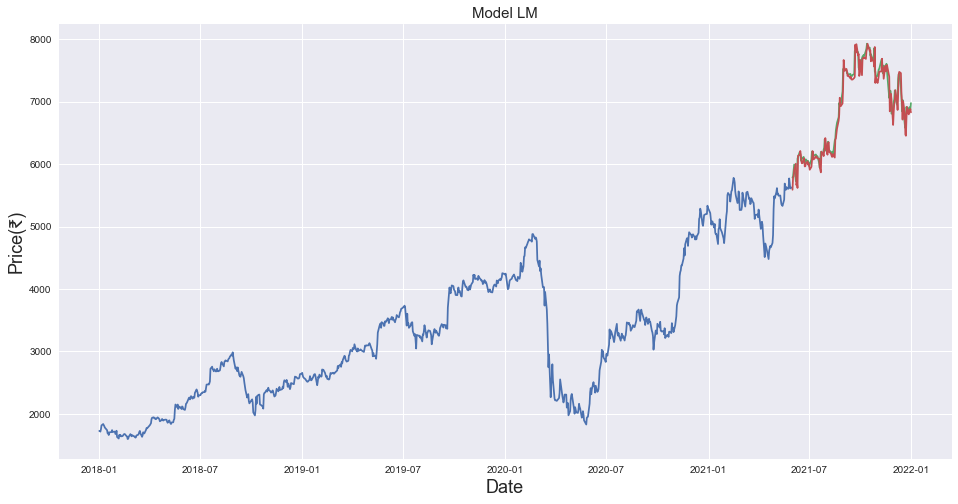

In [28]:
train=data[:training_data_size]
valid=data[training_data_size:]
valid["predictions"]=predictions
plt.figure(figsize=(16,8))
plt.title("Model LM",fontsize=15)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price(₹)",fontsize=18)
plt.plot(train["close"])
plt.plot(valid["close"])
plt.plot(valid["predictions"])

In [29]:
valid.tail()

,close,predictions
Date,,
2021-12-27,6890.75,6797.383301
2021-12-28,6906.65,6855.892090
2021-12-29,6911.65,6878.296875
2021-12-30,6871.10,6883.374512
2021-12-31,6977.30,6829.025391


####  Labeling
We want to predict the stock price at a future time

####  LSTM network the input for each LSTM layer needs to contain the following information
1- The number of Observation
2- The time Steps
3- the features

Therefore we need to add a temporal dimension compared to a classical network
(number of observation, number of steps number of featurses per step